# Working with the lyrics Bag of Word

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_palette('Dark2')
sns.set_style('whitegrid')

In [13]:
con_mxm = sqlite3.connect('../mxm_dataset.db')
cur_mxm = con_mxm.cursor()

# displaying the different table available
tables = con_mxm.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = tables.fetchall()

print('Tables within the database :')
print('{}'.format(table_names[0][0]))
print('{}'.format(table_names[1][0]))

Tables within the database :
words
lyrics


In [18]:
# import the "words" table in a pandas DataFrame
words = pd.read_sql_query("SELECT * FROM words",con_mxm)
print(words.info())
words.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
word    5000 non-null object
dtypes: object(1)
memory usage: 39.1+ KB
None


,word
0,i
1,the
2,you
3,to
4,and


In [19]:
# import the "lyrics" table in a pandas DataFrame
# limit to 10055 to have the exact content of each song (120 songs)
lyrics = pd.read_sql_query("SELECT *\
                            FROM lyrics\
                            ORDER BY track_id ASC\
                            LIMIT 10055",con_mxm)

print(lyrics.info())
lyrics.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10055 entries, 0 to 10054
Data columns (total 5 columns):
track_id    10055 non-null object
mxm_tid     10055 non-null int64
word        10055 non-null object
count       10055 non-null int64
is_test     10055 non-null int64
dtypes: int64(3), object(2)
memory usage: 392.9+ KB
None


,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0


## Removing stopwords

In [21]:
from nltk.corpus import stopwords

In [22]:
stp_wds = stopwords.words()

In [40]:
lyrics_no_stopwords = lyrics[~np.isin(lyrics.word, stp_wds)]
lyrics_no_stopwords.head(5)

,track_id,mxm_tid,word,count,is_test
22,TRAAAAV128F421A322,4623710,like,2,0
27,TRAAAAV128F421A322,4623710,got,1,0
28,TRAAAAV128F421A322,4623710,would,1,0
31,TRAAAAV128F421A322,4623710,seem,1,0
32,TRAAAAV128F421A322,4623710,someon,1,0


In [41]:
words_no_stopwords = words[~np.isin(words.word, stp_wds)]
words_no_stopwords.head(5)

,word
26,love
28,know
35,like
38,time
43,go


In [72]:
# create a table with track_is as index and word as columns
lyrics_mat = lyrics.pivot_table(index='track_id', columns='word', values='count',
                                                         fill_value=0)
lyrics_mat.head(5)

word,&,1,10,100,2,3,30,6,a,aaah,...,yourself,youth,ze,zeit,zero,zu,à,å,ça,è
track_id,,,,,,,,,,,,,,,,,,,,,
TRAAAAV128F421A322,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
TRAAABD128F429CF47,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAED128E0783FAB,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEF128F4273421,0,0,0,0,0,0,0,0,11,0,...,1,0,0,0,0,0,0,0,0,0
TRAAAEW128F42930C0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# create a table with track_is as index and word as columns (no stopwords)
lyrics_no_stopwords_mat =lyrics_no_stopwords.pivot_table(index='track_id', columns='word', values='count',
                                                         fill_value=0)
lyrics_no_stopwords_mat.head(5)

word,&,1,10,100,2,3,30,6,aaah,aah,...,yearn,yellow,yes,yet,york,young,youth,zeit,zero,ça
track_id,,,,,,,,,,,,,,,,,,,,,
TRAAAAV128F421A322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAABD128F429CF47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAED128E0783FAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEF128F4273421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEW128F42930C0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


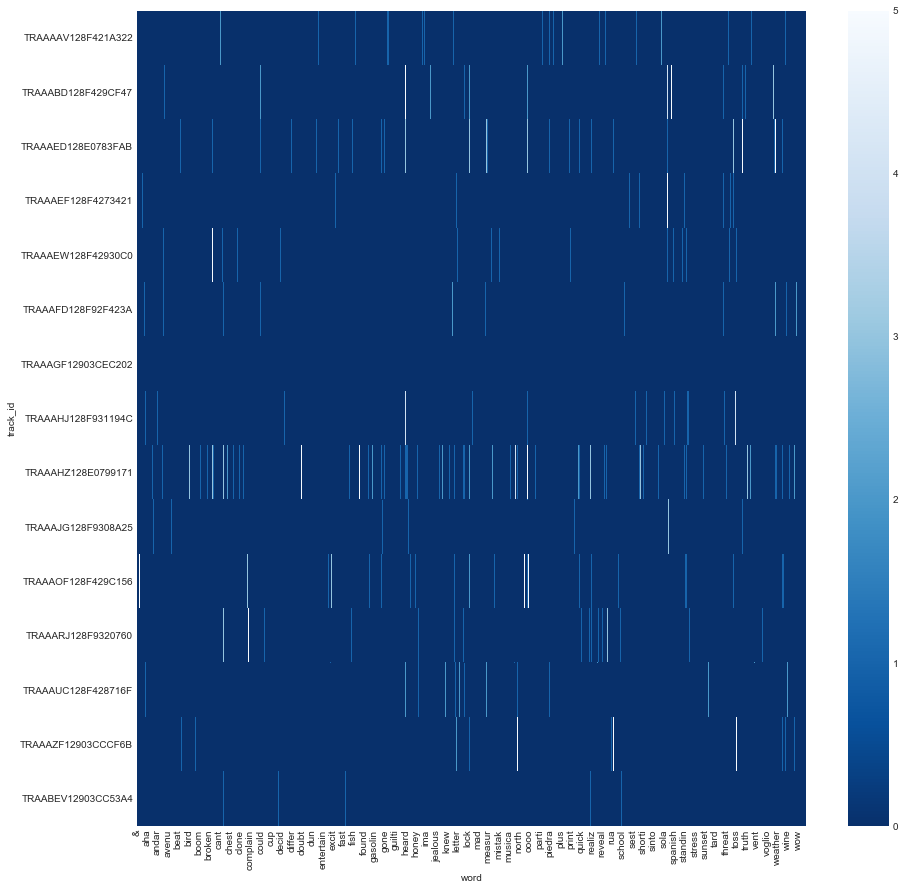

In [90]:
plt.figure(figsize=(15,15))
sns.heatmap(lyrics_no_stopwords_mat.head(15), vmax=5.0, cmap='Blues_r', )